<h1 style="color:blue;text-align:center; font-weight:Bold; text-decoration:underline;">Olympics Data Analysis</h1>

In [1]:
#Importing header files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../Data/Olympics_Data.csv')
data.rename(columns={'Total':'Total_Medals'},inplace=True)
data.head(10)

Country_Name  # Summer  Gold_Summer  Silver_Summer  Bronze_Summer  \
0  Afghanistan        13            0              0              2   
1      Algeria        12            5              2              8   
2    Argentina        23           18             24             28   
3      Armenia         5            1              2              9   
4  Australasia         2            3              4              5   
5    Australia        25          139            152            177   
6      Austria        26           18             33             35   
7   Azerbaijan         5            6              5             15   
8      Bahamas        15            5              2              5   
9      Bahrain         8            0              0              1   

   Total_Summer  # Winter  Gold_Winter  Silver_Winter  Bronze_Winter  \
0             2         0            0              0              0   
1            15         3            0              0              0   
2            70        18            0              0              0   
3            12         6            0              0              0   
4            12         0            0              0              0   
5           468        18            5              3              4   
6            86        22           59             78             81   
7            26         5            0              0              0   
8            12         0            0              0              0   
9             1         0            0              0              0   

   Total_Winter  # Games  Gold_Total  Silver_Total  Bronze_Total  Total_Medals  
0             0       13           0             0             2             2  
1             0       15           5             2             8            15  
2             0       41          18            24            28            70  
3             0       11           1             2             9            12  
4             0        2           3             4             5            12  
5            12       43         144           155           181           480  
6           218       48          77           111           116           304  
7             0       10           6             5            15            26  
8             0       15           5             2             5            12  
9             0        8           0             0             1             1

In [3]:
# Summer or Winter
data['Better_Event']=np.where(data['Total_Summer']>data['Total_Winter'],"Summer",'Winter')
data['Better_Event']=np.where(data['Total_Summer']==data['Total_Winter'],"Both",data['Better_Event'])

In [4]:
data['Better_Event'].head(10)

0    Summer
1    Summer
2    Summer
3    Summer
4    Summer
5    Summer
6    Winter
7    Summer
8    Summer
9    Summer
Name: Better_Event, dtype: object

In [5]:
top_countries=pd.DataFrame(data[['Country_Name','Total_Summer', 'Total_Winter','Total_Medals']])
top_countries.head()
top_countries.tail()

Country_Name  Total_Summer  Total_Winter  \
142  Independent Olympic Participants             3             0   
143                            Zambia             2             0   
144                          Zimbabwe             8             0   
145                        Mixed team            17             0   
146                            Totals         14714          2865   

     Total_Medals  
142             3  
143             2  
144             8  
145            17  
146         17579

In [6]:
# top_countries=top_countries[:-1]
top_countries.drop(top_countries.tail(1).index,inplace = True)
top_countries.tail()

Country_Name  Total_Summer  Total_Winter  \
141                        Yugoslavia            83             4   
142  Independent Olympic Participants             3             0   
143                            Zambia             2             0   
144                          Zimbabwe             8             0   
145                        Mixed team            17             0   

     Total_Medals  
141            87  
142             3  
143             2  
144             8  
145            17

In [7]:
def top_ten(top_countries,Col):
    country_list= list((data.nlargest(11,Col)['Country_Name']))
    return country_list

In [8]:
top_10_summer = top_ten(top_countries,'Total_Summer')[1:]
# top_10_summer.pop()
top_10_summer

['United States',
 'Soviet Union',
 'Great Britain',
 'France',
 'Germany',
 'Italy',
 'Sweden',
 'Hungary',
 'China',
 'Australia']

In [9]:
top_10_winter = top_ten(top_countries,'Total_Winter')[1:]
top_10_winter

['Norway',
 'United States',
 'Austria',
 'Germany',
 'Soviet Union',
 'Canada',
 'Finland',
 'Sweden',
 'Switzerland',
 'Russia']

In [10]:
top_10 = top_ten(top_countries,'Total_Medals')[1:]
top_10

['United States',
 'Soviet Union',
 'Great Britain',
 'Germany',
 'France',
 'Italy',
 'Sweden',
 'China',
 'East Germany',
 'Russia']

In [11]:
country_list=list(set(top_10)&set(top_10_summer)&set(top_10_winter))
country_list

['Sweden', 'United States', 'Soviet Union', 'Germany']

In [12]:
summer_df= data[data['Country_Name'].isin(top_10_summer)]
winter_df= data[data['Country_Name'].isin(top_10_winter)]
top_df= data[data['Country_Name'].isin(top_10)]

In [13]:
plt.figure(figsize=[16,5])
plt.bar(summer_df['Country_Name'],summer_df['Total_Summer'])
plt.title("Top 10 Summer")

Text(0.5, 1.0, 'Top 10 Summer')

<BarContainer object of 10 artists>

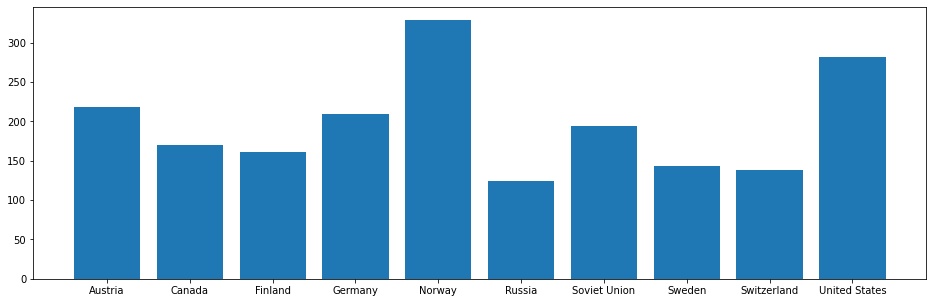

In [14]:
plt.figure(figsize=[16,5])
plt.bar(winter_df['Country_Name'],winter_df['Total_Winter'])


In [15]:
plt.figure(figsize=[16,5])
plt.bar(top_df['Country_Name'],top_df['Total_Medals'])

<BarContainer object of 10 artists>

In [16]:
summer_df['Golden_Ratio']=summer_df['Gold_Summer']/summer_df['Total_Summer']
summer_max_ratio=max(summer_df['Golden_Ratio'])
summer_country_gold=summer_df.loc[summer_df['Golden_Ratio'].idxmax(),'Country_Name']

winter_df['Golden_Ratio']=winter_df['Gold_Winter']/winter_df['Total_Winter']
winter_max_ratio=max(winter_df['Golden_Ratio'])
winter_country_gold=winter_df.loc[winter_df['Golden_Ratio'].idxmax(),'Country_Name']

top_df['Golden_Ratio']=top_df['Gold_Total']/top_df['Total_Medals']
top_max_ratio = max(top_df['Golden_Ratio'])
top_country_gold = top_df.loc[winter_df['Golden_Ratio'].idxmax(),'Country_Name']

<ipython-input-16-494a16dae996>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer_df['Golden_Ratio']=summer_df['Gold_Summer']/summer_df['Total_Summer']
<ipython-input-16-494a16dae996>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter_df['Golden_Ratio']=winter_df['Gold_Winter']/winter_df['Total_Winter']
<ipython-input-16-494a16dae996>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [17]:
data_1=data[:-1]

In [18]:
data_1.tail()

Country_Name  # Summer  Gold_Summer  Silver_Summer  \
141                        Yugoslavia        16           26             29   
142  Independent Olympic Participants         1            0              1   
143                            Zambia        12            0              1   
144                          Zimbabwe        12            3              4   
145                        Mixed team         3            8              5   

     Bronze_Summer  Total_Summer  # Winter  Gold_Winter  Silver_Winter  \
141             28            83        14            0              3   
142              2             3         0            0              0   
143              1             2         0            0              0   
144              1             8         1            0              0   
145              4            17         0            0              0   

     Bronze_Winter  Total_Winter  # Games  Gold_Total  Silver_Total  \
141              1             4       30          26            32   
142              0             0        1           0             1   
143              0             0       12           0             1   
144              0             0       13           3             4   
145              0             0        3           8             5   

     Bronze_Total  Total_Medals Better_Event  
141            29            87       Summer  
142             2             3       Summer  
143             1             2       Summer  
144             1             8       Summer  
145             4            17       Summer

In [19]:
data_1['Total_Points']= data_1['Gold_Total']*3 + data_1['Silver_Total']*2 + data_1['Bronze_Total']*1

<ipython-input-19-43db57422535>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['Total_Points']= data_1['Gold_Total']*3 + data_1['Silver_Total']*2 + data_1['Bronze_Total']*1


In [24]:
most_points=max(data_1['Total_Points'])
print(most_points)

5684


In [21]:
best_country=data_1.loc[data_1['Total_Points'].idxmax(),'Country_Name']
print('The maximum points achieved is ', most_points, ' by ', best_country )

The maximum points achieved is  5684  by  United States


In [22]:
best=data[data['Country_Name']==best_country]
best.reset_index(drop = True, inplace = True)
best=best[['Gold_Total','Silver_Total','Bronze_Total']]

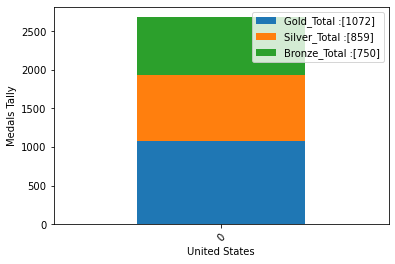

In [23]:
best.plot.bar(stacked=True)
plt.xlabel('United States')
plt.ylabel('Medals Tally')
plt.xticks(rotation=45)
l=plt.legend()
l.get_texts()[0].set_text('Gold_Total :' + str(best['Gold_Total'].values))
l.get_texts()[1].set_text('Silver_Total :' + str(best['Silver_Total'].values))
l.get_texts()[2].set_text('Bronze_Total :' + str(best['Bronze_Total'].values))